# Tracking Inference

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import json
import sys
import torch

sys.path.append("../")
from environments.sac_tracking_env import Environment
from models import ResNet3D, ResidualBlock3D, ConvNet
from solvers import sac

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
dtype = torch.float32

## Instantiate environment

In [41]:
config_file = "../configs/sac_inference_curves_no_artifacts_b-2.json"
with open(config_file) as f:
    params = json.load(f)
    
img_path = params["img_path"]
outdir = params["outdir"]
name = params["name"]
step_size = params["step_size"] if "step_size" in params else 1.0
step_width = params["step_width"] if "step_width" in params else 1.0
batch_size = params["batchsize"] if "batchsize" in params else 256
tau = params["tau"] if "tau" in params else 0.005
gamma = params["gamma"] if "gamma" in params else 0.99
lr = params["lr"] if "lr" in params else 0.001
alpha = params["alpha"] if "alpha" in params else 1.0
beta = params["beta"] if "beta" in params else 1e-3
friction = params["friction"] if "friction" in params else 1e-4
n_episodes = params["n_episodes"] if "n_episodes" in params else 100
init_temperature = params["init_temperature"] if "init_temperature" in params else 0.005
target_entropy = params["target_entropy"] if "target_entropy" in params else 0.0
branching = params["branching"] if "branching" in params else True
section_masking = params["section_masking"] if "section_masking" in params else False
patch_radius = 17


env = Environment(img_path,
                radius=patch_radius,
                step_size=step_size,
                step_width=step_width,
                max_len=1000,
                alpha=alpha,
                beta=beta,
                friction=friction,
                branching=branching,
                section_masking=section_masking)

## Instantiate actor network

In [42]:
in_channels = 4
actor = ConvNet(chin=in_channels, chout=5)
actor = actor.to(device=DEVICE,dtype=dtype)
if "sac_weights" in params:
    sac_path = params["sac_weights"]
    state_dicts = torch.load(sac_path)
    actor.load_state_dict(state_dicts["policy_state_dict"])

## Perform tracking

TP: 1, FP: 1, FN: 2, TN: 63


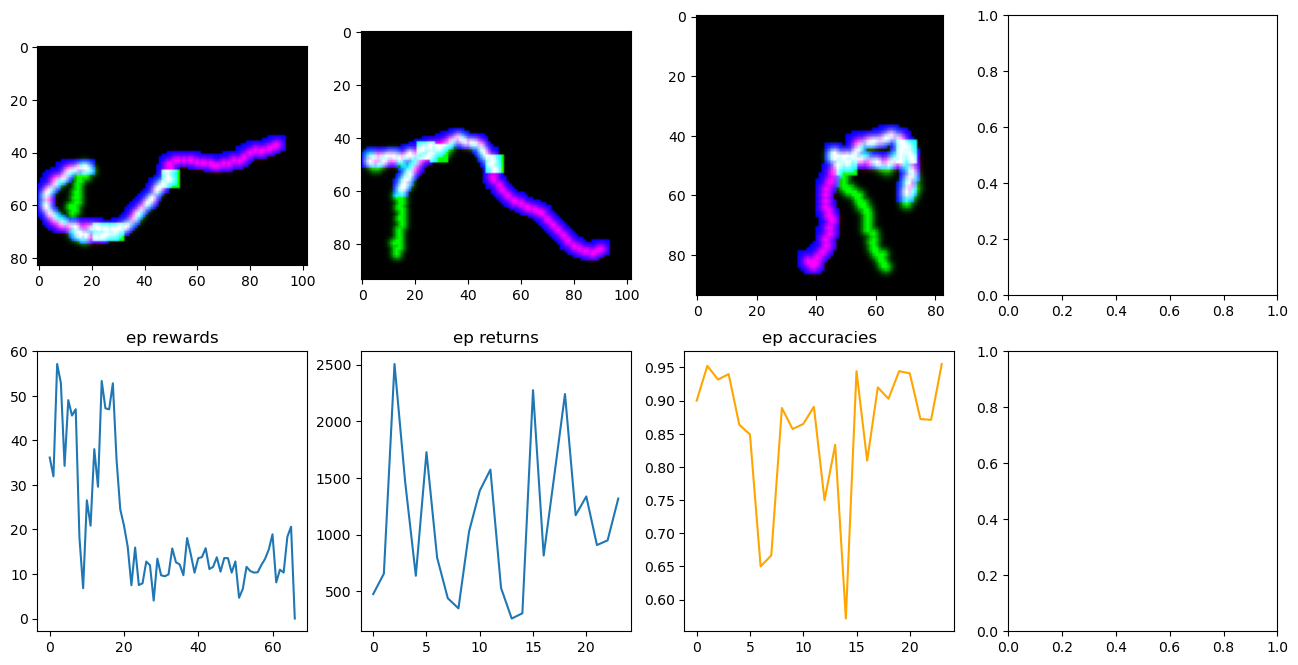

num branches: 3


  0%|          | 5/1000 [01:43<5:46:08, 20.87s/it]

Exiting inference.


  0%|          | 5/1000 [01:56<6:24:47, 23.20s/it]

Exiting inference.


RuntimeError: stack expects a non-empty TensorList

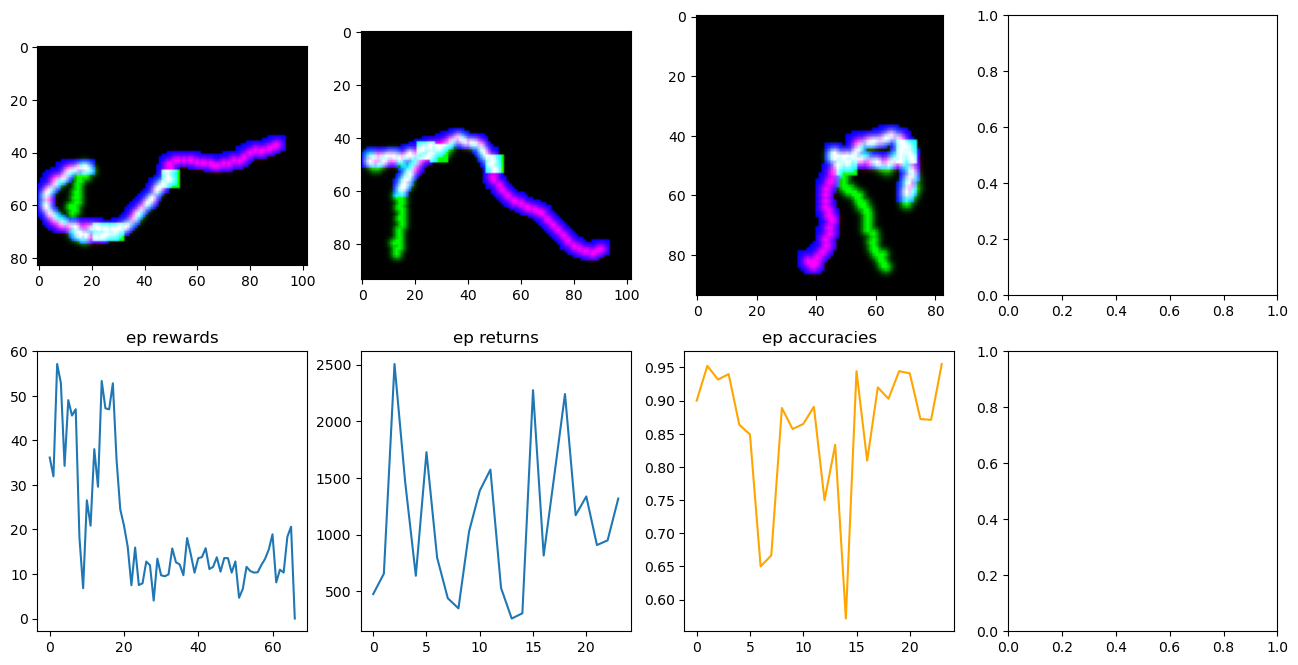

In [43]:
sac.inference(env, actor, outdir, save=False, manual=True)